## Score Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
ver = '1'

In [3]:
model_dict_1 = pickle.load(open('model_perf.pkl_'+ver,'rb'))

In [4]:
model_df = pd.DataFrame(model_dict_1['models'])

In [5]:
model_df['model_type'].unique()

array(['Logistic Regression', 'Decision Tree Regressor', 'K Neighbors',
       'Random Forest', 'Support Vector Classifier'], dtype=object)

<h2>Model Summaries</h2>
<table style="width:80%">
<tr>
<th>Model</th>
<th>Hyperparameters</th>
<th>No of Features</th>
<th>AUC Score</th>
</tr>
<tr>
<td>Logistic Regression</td>
<td>C -  0.1</td>
<td>5</td>
<td>0.624</td>
</tr>
<tr>
<td>Decision Tree Classifier</td>
<td>Min Leaves -  30</td>
<td>30</td>
<td>0.584</td>
</tr>
<tr>
<td>K Nearest Neighbors</td>
<td>No of Neighbors -  3<br>Metric - Euclidean<br>Weight - Distance</td>
<td>40</td>
<td>0.548</td>
</tr>
<tr>
<td>Random Forest</td>
<td>No of Trees -  100<br>Min Leaves - 7</td>
<td>45</td>
<td>0.593</td>
</tr>
<tr>
<td>Support Vector Classifier</td>
<td>C - 0.1<br>Kernel - Polynomial</td>
<td>5</td>
<td>0.625</td>
</tr>
</table>

# Logistic Regression Model Analysis

In [6]:
log_reg = model_df[model_df['model_type'] == 'Logistic Regression']

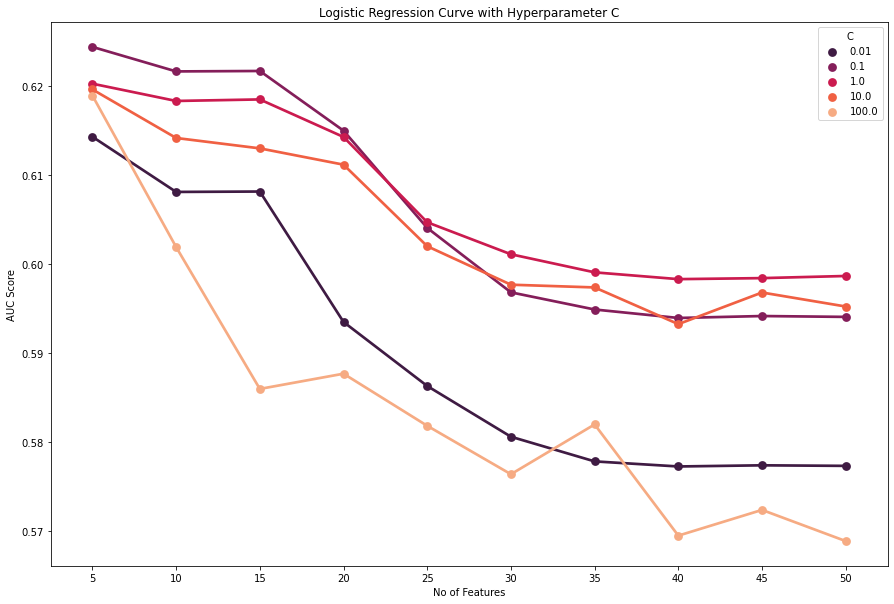

In [29]:
fig,axes = plt.subplots(figsize=(15,10))
sns.pointplot(x='no_of_features',y='AUC Score',hue='C',data=log_reg, palette = 'rocket')
plt.title('Logistic Regression Curve with Hyperparameter C')
plt.xlabel('No of Features')
plt.savefig('log_reg_1')
plt.show()


Notes : 
    Experiment with C value less than 0.01

# Decision Tree Classifier

In [8]:
dec_cls = model_df[model_df['model_type'] == 'Decision Tree Regressor']

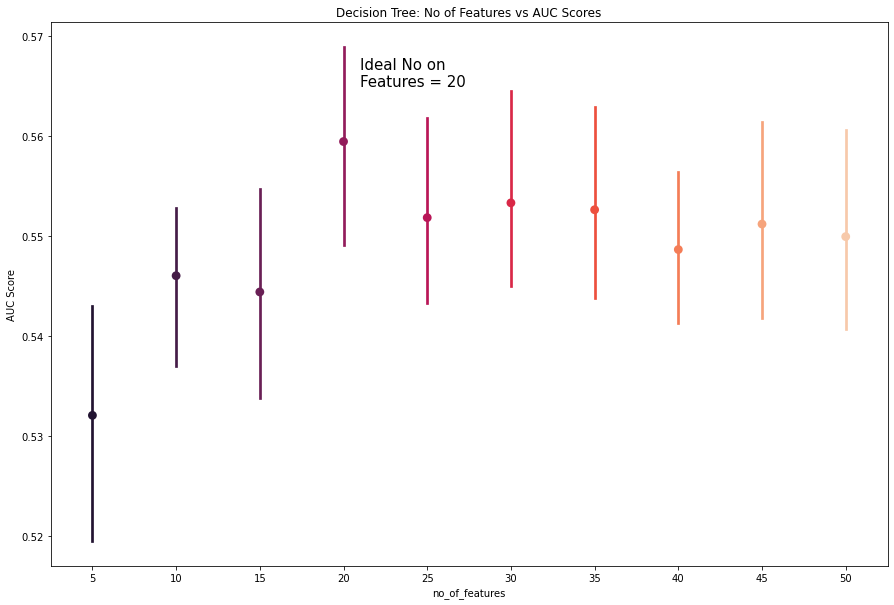

In [30]:
fig,axes = plt.subplots(figsize=(15,10))
sns.pointplot(x='no_of_features',y='AUC Score',data=dec_cls,palette='rocket')
plt.title('Decision Tree: No of Features vs AUC Scores')
plt.text(3.2,0.565,'Ideal No on\nFeatures = 20',fontsize=15)
plt.savefig('dec_tree_1')
plt.show()

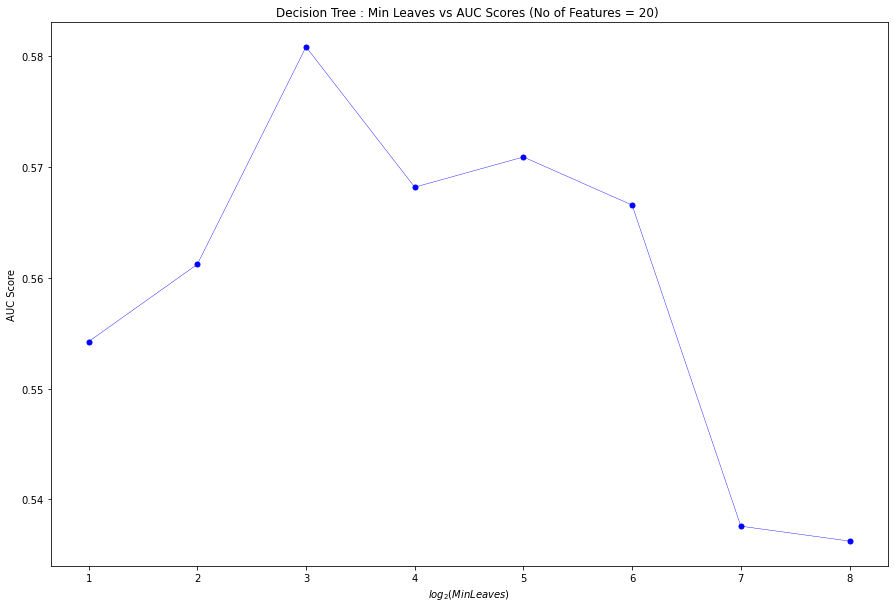

In [31]:
dec_cls_20 = dec_cls[dec_cls['no_of_features']==20]
fig,axes = plt.subplots(figsize=(15,10))
plt.plot(np.log2(dec_cls_20['Min Leaves']),dec_cls_20['AUC Score'],'bo-',linewidth=0.4,markersize=5)
plt.title('Decision Tree : Min Leaves vs AUC Scores (No of Features = 20) ')
plt.xlabel(r'$log_2(Min Leaves)$')
plt.ylabel('AUC Score')
plt.savefig('dec_tree_2')
plt.show()

# K Nearest Neighbors

In [11]:
knn = model_df[model_df['model_type'] == 'K Neighbors']

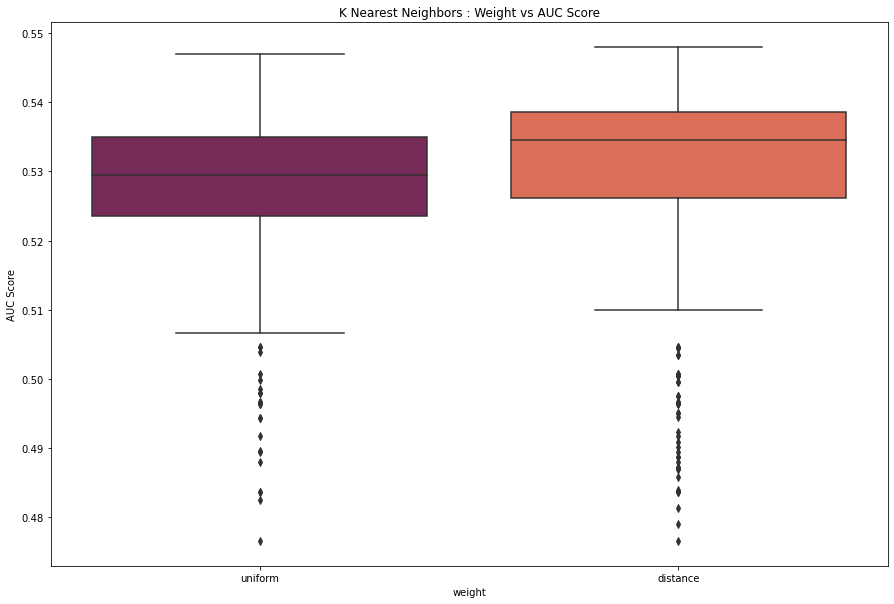

In [32]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(data=knn,x='weight',y='AUC Score',palette='rocket')
plt.title('K Nearest Neighbors : Weight vs AUC Score')
plt.savefig('knn_1')
plt.show()

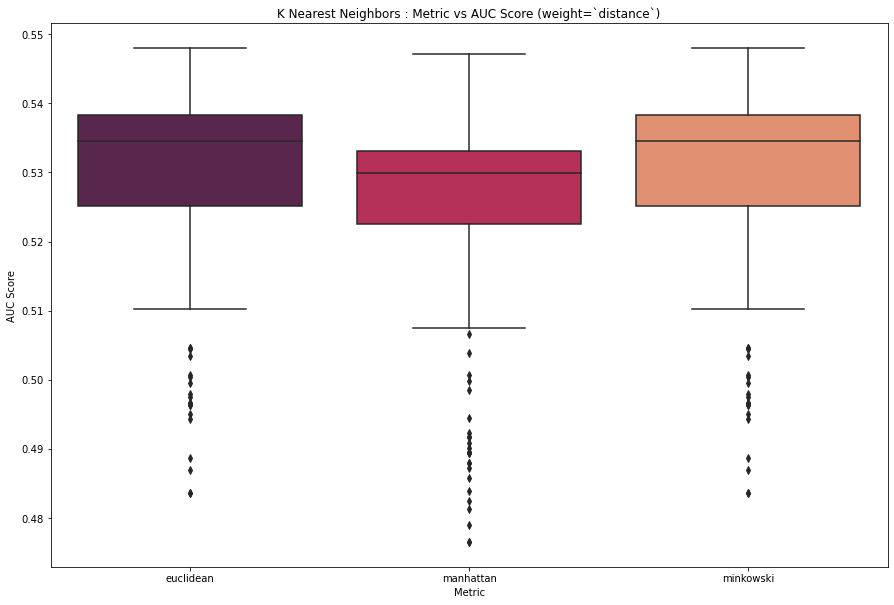

In [33]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(data=knn,x='metric',y='AUC Score',palette='rocket')
plt.title('K Nearest Neighbors : Metric vs AUC Score (weight=`distance`)')
plt.xlabel('Metric')
plt.savefig('knn_2')
plt.show()

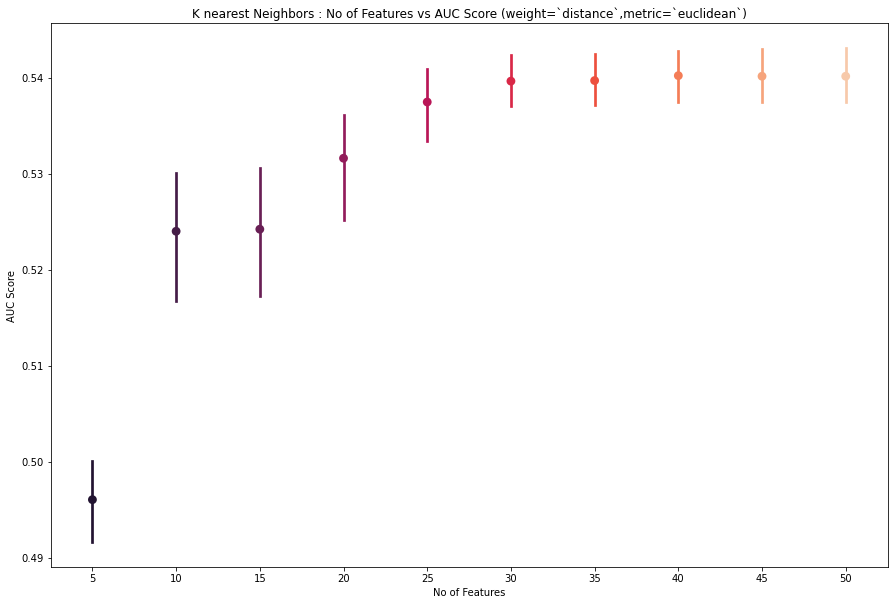

In [34]:
knn_opt = knn[(knn['metric']=='euclidean') & (knn['weight']=='distance')]
fig,axes = plt.subplots(figsize=(15,10))
sns.pointplot(x='no_of_features',y='AUC Score',data=knn_opt,palette='rocket')
plt.title('K nearest Neighbors : No of Features vs AUC Score (weight=`distance`,metric=`euclidean`)')
plt.xlabel('No of Features')
plt.savefig('knn_3')
plt.show()

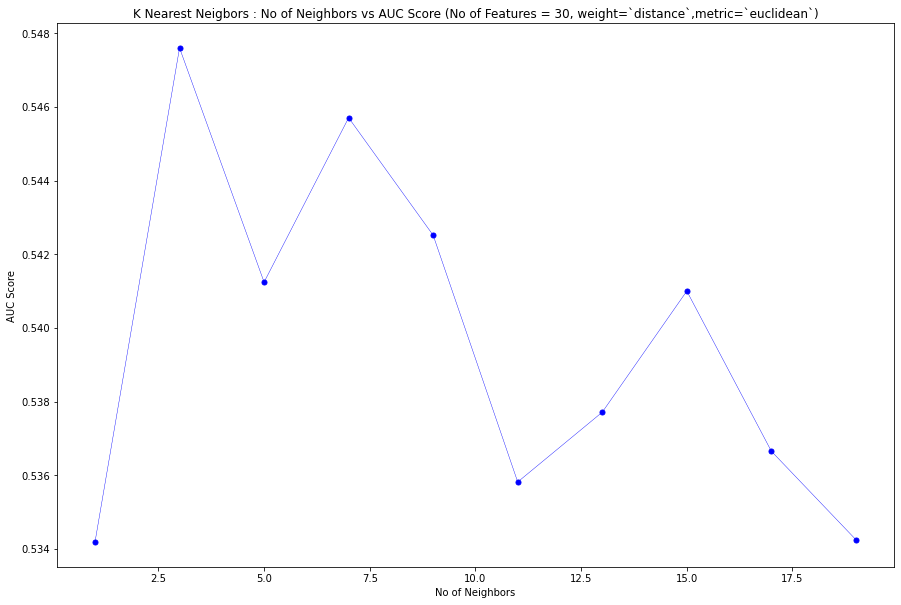

In [35]:
knn_opt_30 = knn_opt[knn_opt['no_of_features']==30]
fig,axes = plt.subplots(figsize=(15,10))
plt.plot(knn_opt_30['Number of Neighbors'],knn_opt_30['AUC Score'],'bo-',linewidth=0.4,markersize=5)
plt.title('K Nearest Neigbors : No of Neighbors vs AUC Score (No of Features = 30, weight=`distance`,metric=`euclidean`)')
plt.xlabel(r'No of Neighbors')
plt.ylabel('AUC Score')
plt.savefig('knn_4')
plt.show()

# Random Forest 

In [16]:
rf = model_df[model_df['model_type']=='Random Forest']

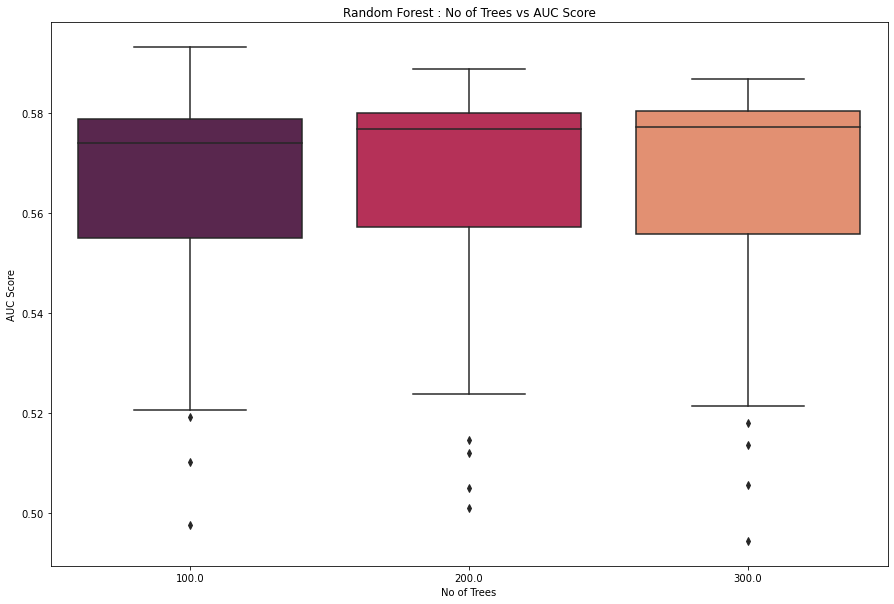

In [17]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(data=rf,x='no_of_trees',y='AUC Score',palette='rocket')
plt.title('Random Forest : No of Trees vs AUC Score')
plt.xlabel('No of Trees')
plt.savefig('knn_4')
plt.show()

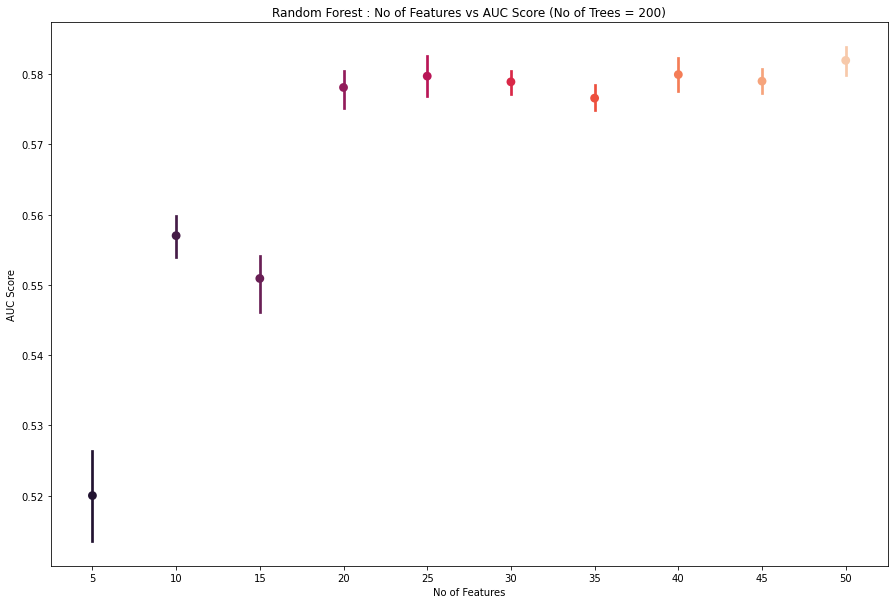

In [18]:
fig,axes = plt.subplots(figsize=(15,10))
rf_trees_200 = rf[rf['no_of_trees']==200]
sns.pointplot(data=rf_trees_200,x='no_of_features',y='AUC Score',palette='rocket')
plt.xlabel('No of Features')
plt.title('Random Forest : No of Features vs AUC Score (No of Trees = 200)')
plt.show()

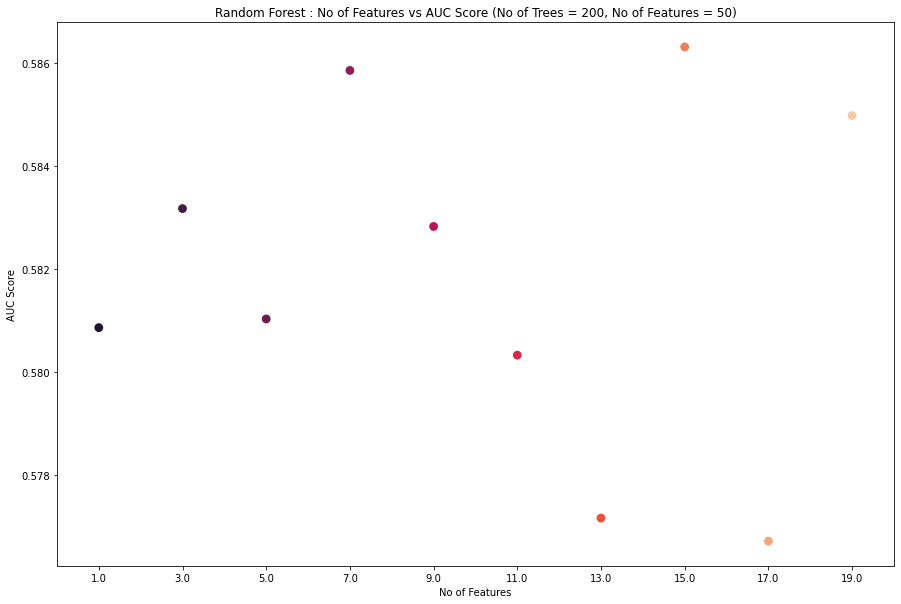

In [19]:
fig,axes = plt.subplots(figsize=(15,10))
rf_trees_200_50 = rf_trees_200[rf_trees_200['no_of_features']==50]
sns.pointplot(data=rf_trees_200_50,x='min_leaves',y='AUC Score',palette='rocket')
plt.xlabel('No of Features')
plt.title('Random Forest : No of Features vs AUC Score (No of Trees = 200, No of Features = 50)')
plt.show()

# SVM

In [20]:
svm = model_df[model_df['model_type']=='Support Vector Classifier']

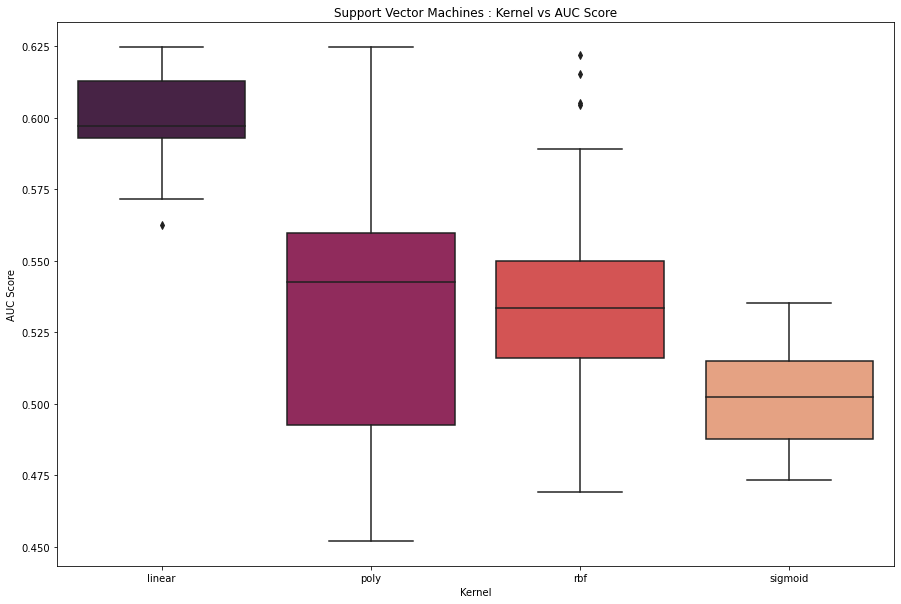

In [21]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(data=svm,x='Kernel',y='AUC Score',palette='rocket')
plt.title('Support Vector Machines : Kernel vs AUC Score')
plt.show()

In [22]:
svm_linear = svm[svm['Kernel']=='linear']

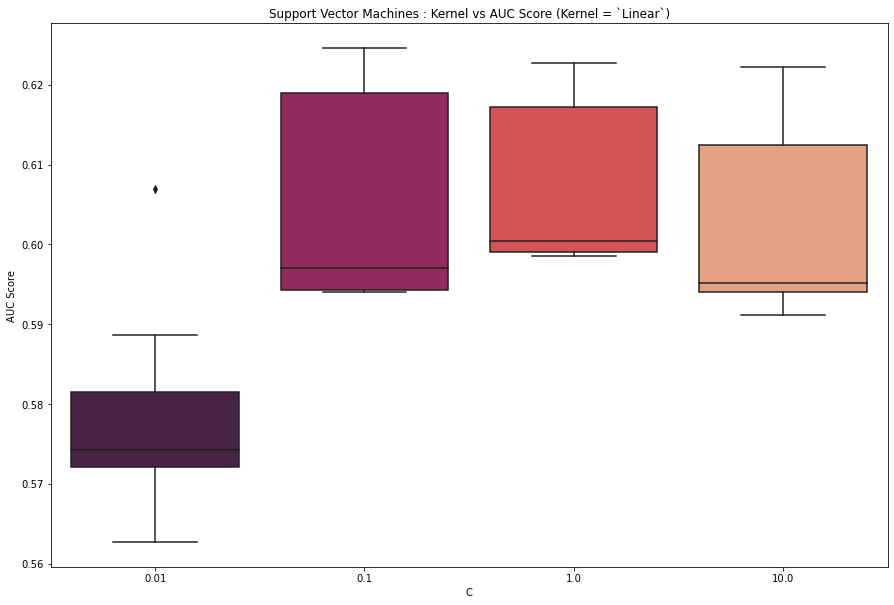

In [23]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(data=svm_linear,x='C',y='AUC Score',palette='rocket')
plt.title('Support Vector Machines : Kernel vs AUC Score (Kernel = `Linear`)')
plt.show()

In [24]:
svm_linear_c_10 = svm_linear[svm_linear['C']==0.1]

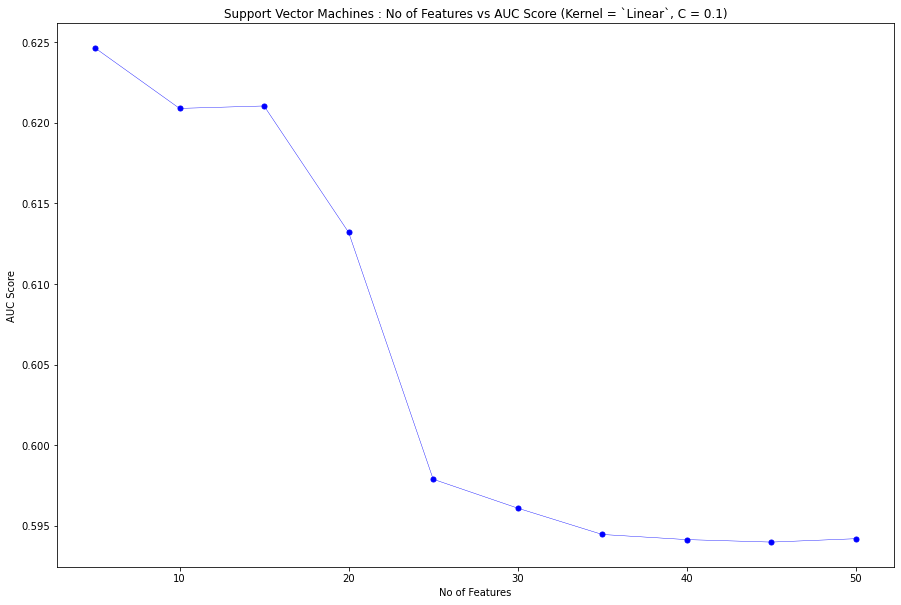

In [25]:
fig,axes = plt.subplots(figsize=(15,10))
plt.plot(svm_linear_c_10['no_of_features'],svm_linear_c_10['AUC Score'],'bo-',linewidth=0.4,markersize=5)
plt.title('Support Vector Machines : No of Features vs AUC Score (Kernel = `Linear`, C = 0.1)')
plt.xlabel('No of Features')
plt.ylabel('AUC Score')
plt.show()